## Modeling 코드
### 주제 1: 머신러닝 기반 매출의 영향 요인 분석
- feature: 버스정류장 개수, 지하철역 개수, 경쟁점 개수, 상업지역 비율, 주거지역 비율, 인구수, 유동인구비율
    - feature Engineer: VIF 확인
- target: 깐부치킨, 생활맥주
    - 깐부치킨: 인구당 매출 > 2500 (성공), 인구당 매출 < 500 (실패)
- y = 성공(1) or 실패(0)

In [153]:
## import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Load Data
gganbu = pd.read_csv("../../../resources/processedData/깐부치킨_입지특성_모델_feature.csv", encoding='utf8')
# full set
gganbu_full = pd.read_csv("../../../resources/processedData/깐부치킨_입지특성_모델_feature_full3.csv", encoding='utf8')

In [70]:
gganbu

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,주거지역 비율,인구수,유동인구비율,인구당매출,y
0,T06644,청담동,(주)깐부 청담본점,13,2,10,0.401674,0.577653,30014,1.42,2662.957,1
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,0.163217,0.779494,45160,0.94,279.949,0
2,T79908,신사동,깐부치킨 신사가로수점,7,0,8,0.320944,0.624547,17541,2.14,3005.986,1
3,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,0.285410,0.685366,36560,1.36,402.694,0
4,S35539,삼성1동,깐부치킨(삼성1동점),11,7,9,0.336420,0.648843,14811,3.02,2799.710,1
5,S24077,삼성1동,깐부치킨(삼성점),17,1,21,0.441027,0.558259,14811,3.02,2644.724,1
6,S31130,대치4동,깐부치킨(선릉역1번출구점),21,16,28,0.003526,0.603634,20773,1.62,2582.010,1
7,T74630,신사동,깐부치킨(신사역점),12,8,21,0.368677,0.621461,17541,2.14,3305.399,1
8,T78908,신사동,깐부치킨(압구정한강고수부지),0,0,0,0.034060,0.713664,17541,2.14,393.706,0
9,S42681,신사동,깐부치킨(압구정현대백화점),12,5,9,0.386134,0.595838,17541,2.14,2599.225,1


In [273]:
gganbu_full

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,인구수,유동인구비율,상업지역 면적,주거지역 면적,y_success,y_fail
0,T06644,청담동,(주)깐부 청담본점,13,2,10,30014,1.42,269846.246200,388069.573100,1,0
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,45160,0.94,17855.172790,85272.945180,0,1
2,S49287,대치1동,깐부치킨 대치역점,14,8,18,25413,1.02,45248.342350,176161.728700,0,0
3,T79908,신사동,깐부치킨 신사가로수점,7,0,8,17541,2.14,171338.369400,333419.080700,1,0
4,T53532,역삼1동,깐부치킨 역삼본점,15,8,37,35878,3.02,293097.445400,1260.685696,0,0
5,S23991,삼성2동,깐부치킨(강남구청역1번출구점),10,10,17,30291,1.29,145248.426300,368678.340900,0,0
6,T46063,논현2동,깐부치킨(강남구청역3번출구점),14,10,18,21960,2.00,182277.484400,342598.190300,0,0
7,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,36560,1.36,122254.414300,293574.604000,0,1
8,S37219,역삼1동,깐부치킨(강남역플래티넘점),32,20,29,35878,3.02,250476.594700,10173.239100,0,0
9,S41446,개포2동,깐부치킨(개포점),21,15,11,14380,1.07,12692.260300,108435.066800,0,0


In [272]:
gganbu_full[gganbu_full["y_fail"]==1].index

Int64Index([1, 7, 21, 25, 26], dtype='int64')

In [380]:
## VIF 분석할 target data 선언
# 1. 성공/실패 예측
# 2. 성공/ 나머지 or 실패/ 나머지 예측
# 3. 성공/ 나머지-실패 or 실패/ 나머지-성공
sub = 2
sub_target = "실패"

if sub == 1: 
    data = gganbu
    feature_name = ["버스정류장 개수", "지하철역 개수","경쟁점 개수", "상업지역 비율", "주거지역 비율", "인구수",  "유동인구비율"]
    y_label = "y"
    y_label_name = ["실패","성공"]
    
elif sub == 2:
    data = gganbu_full
    # "문화체육휴양시설 면적",
    feature_name = ["버스정류장 개수", "지하철역 개수","경쟁점 개수", "상업지역 면적","주거지역 면적", "인구수",  "유동인구비율"] 
    if sub_target == "성공":
        y_label = "y_success"
        y_label_name = ["나머지","성공"]
        
    elif sub_target == "실패":
        y_label = "y_fail"
        y_label_name = ["나머지","실패"]
        
else :
    data = gganbu_full
    feature_name = ["버스정류장 개수", "지하철역 개수","경쟁점 개수", "상업지역 면적","주거지역 면적", "인구수",  "유동인구비율"] 
    if sub_target == "성공":
        # 실패 index 추출
        fail_index = gganbu_full[gganbu_full["y_fail"]==1].index
        data = data.drop(index=fail_index, axis=0)
        y_label = "y_success"
        y_label_name = ["나머지-실패","성공"]
        
    elif sub_target == "실패":
        # 실패 index 추출
        success_index = gganbu_full[gganbu_full["y_success"]==1].index
        data = data.drop(index=success_index, axis=0)
        y_label = "y_fail"
        y_label_name = ["나머지-성공","성공"]

In [381]:
## Prepare the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# set X,y
# ["버스정류장 개수", "지하철역 개수","경쟁점 개수", "상업지역 비율", "주거지역 비율", "인구수",  "유동인구비율"]
# ["버스정류장 개수", "지하철역 개수","경쟁점 개수", "주거지역 비율"," 상업지역 면적", "문화체육휴양시설 면적", "주거지역 면적", "인구수",  "유동인구비율"]
X = data[feature_name]
y = data[y_label]

# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
#X_train, X_test, y_train, y_test = StratifiedShuffleSplit(X, y, test_size=0.35, random_state=0)

# Standardized data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, plot_roc_curve

def model_execution(model, algorithm_name, feature_name, x_train, y_train, x_test, y_test):

    # 모델 학습
    model.fit(x_train, y_train)
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = y_label_name, # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    #plt.savefig('../figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    plot_roc_curve(model, X_test, y_test)
    plt.show() 
    
    # 변수 중요도 산출
    if (algorithm_name == "Logistic Regression") :
        # feature importance를 column 별로 시각화 하기 
        sns.barplot(x=model.coef_[0] , y=feature_name)# feature importance를 column 별로 시각화 하기 
        sns.barplot(x=model.coef_[0] , y=feature_name)
        plt.title("Feature Importance - "+algorithm_name ,fontsize=15)

    else: 
        dt_importance = pd.DataFrame()
        dt_importance['Feature'] = feature_name # 설명변수 이름
        dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

        # 변수 중요도 내림차순 정렬
        dt_importance.sort_values("Importance", ascending = False, inplace = True)
        print(dt_importance.round(3))
        # 변수 중요도 오름차순 정렬
        dt_importance.sort_values("Importance", ascending = True, inplace = True)
        # 변수 중요도 시각화
        coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
        plt.title("Feature Importance - "+algorithm_name ,fontsize=15)
        plt.barh(y = coordinates, width = dt_importance["Importance"])
        plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
        plt.xlabel("Feature Importance") # x축 이름
        plt.ylabel("Features") # y축 이름
        #plt.savefig('../figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

Train Accuracy: 1.000
Test Accuracy: 0.917
Precision: 1.000
Recall: 0.500
F1-score: 0.667


c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2160x2160 with 0 Axes>

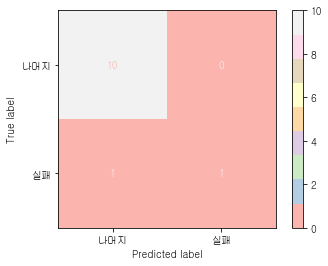

c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


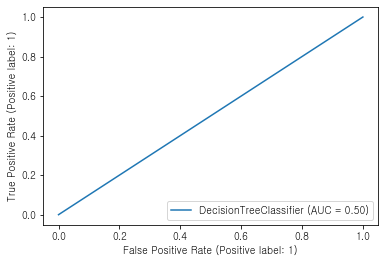

    Feature  Importance
1   지하철역 개수       0.517
5       인구수       0.261
3   상업지역 면적       0.222
0  버스정류장 개수       0.000
2    경쟁점 개수       0.000
4   주거지역 면적       0.000
6    유동인구비율       0.000


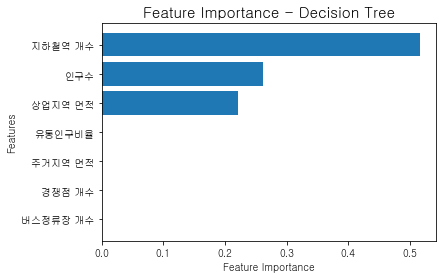

In [383]:
## Decision Tree
from sklearn import tree
gganbu_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model_execution(gganbu_tree, "Decision Tree", feature_name, X_train_std, y_train, X_test_std, y_test)


Train Accuracy: 1.000
Test Accuracy: 0.700
Precision: 0.000
Recall: 0.000
F1-score: 0.000


c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2160x2160 with 0 Axes>

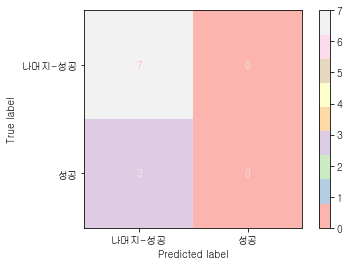

c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


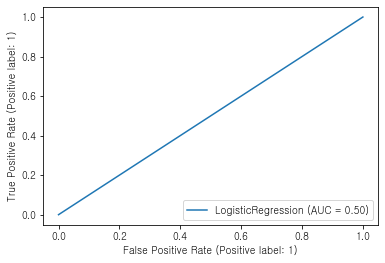

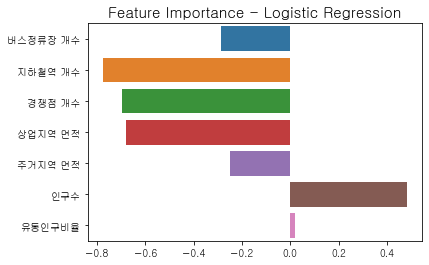

In [378]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

gganbu_lr = LogisticRegression()
model_execution(gganbu_lr, "Logistic Regression", feature_name, X_train_std, y_train, X_test_std, y_test)


Train Accuracy: 1.000
Test Accuracy: 0.700
Precision: 0.000
Recall: 0.000
F1-score: 0.000


c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2160x2160 with 0 Axes>

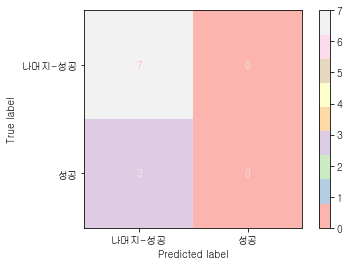

c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


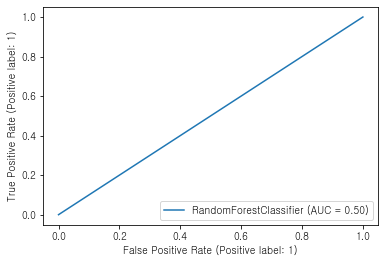

    Feature  Importance
2    경쟁점 개수       0.264
5       인구수       0.190
6    유동인구비율       0.165
0  버스정류장 개수       0.145
3   상업지역 면적       0.100
1   지하철역 개수       0.085
4   주거지역 면적       0.052


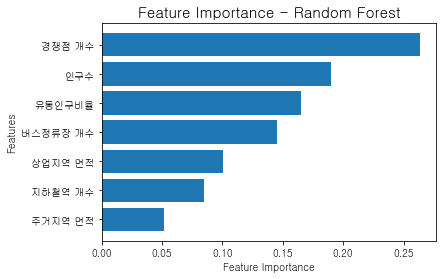

In [379]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

gganbu_rf = RandomForestClassifier(random_state=5)
#gganbu_rf.fit(X_train_std, y_train)
#y_pred = gganbu_rf.predict(X_test_std)
#print(classification_report(y_test, y_pred, target_names=y_label_name))
model_execution(gganbu_rf, "Random Forest", feature_name, X_train_std, y_train, X_test_std, y_test)



In [260]:
## Cross-validation 진행 (데이터가 적기때문에 증대 효과 기대)
from sklearn.model_selection import KFold
import numpy as np

# cross-validation def 선언
k = 10

import time

# 표준화된 데이터셋
X_std = sc.fit_transform(X)

# Cross Validation Def
def cross_validation(model, X, y):

  start = time.time() # 시작 시간
  cv_accuracy=[]
  n_iter = 0
  
  for train_index, test_index in KFold(k).split(X_std):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4) # 소수점 4자리 반올림
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
  print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

  return cv_accuracy

In [261]:
# Cross-valid 결과
print("***Decision Tree***")
acc_gganbu_dt_cv = cross_validation(gganbu_tree, X_std,y)

***Decision Tree***

#1 교차 검증 정확도 : 0.3333,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#3 검증 세트 인덱스 : [6 7 8]

#4 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#4 검증 세트 인덱스 : [ 9 10 11]

## 평균 검증 정확도: 0.666675


In [262]:
print("***Logistic Regression***")
acc_gganbu_lr_cv = cross_validation(gganbu_lr,X_std,y)

***Logistic Regression***

#1 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#3 검증 세트 인덱스 : [6 7 8]

#4 교차 검증 정확도 : 0.3333,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#4 검증 세트 인덱스 : [ 9 10 11]

## 평균 검증 정확도: 0.75


In [267]:
print("***RandomForest***")
acc_gganbu_rf_cv = cross_validation(gganbu_rf,X_std,y)

***RandomForest***

#1 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#3 검증 세트 인덱스 : [6 7 8]

#4 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#4 검증 세트 인덱스 : [ 9 10 11]

## 평균 검증 정확도: 0.750025
